In [1]:
import os
import sys
from pathlib import Path

project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

try:
    from dotenv import load_dotenv
    env_path = project_root / ".env"
    if env_path.exists():
        load_dotenv(env_path)
        print(f"Loaded .env from {env_path}")
    else:
        load_dotenv()
except ImportError:
    print("python-dotenv not available, skipping .env loading")

print(f"Project root: {project_root}")
print(f"Python path includes: {project_root in [Path(p) for p in sys.path]}")


Loaded .env from /Users/aadisarma/GT25/CS8803/LLM_AutoCommentary/.env
Project root: /Users/aadisarma/GT25/CS8803/LLM_AutoCommentary
Python path includes: True


In [2]:
from src.training.train_seq_classifier import train_seq_classifier

print("Training function imported successfully!")


Training function imported successfully!


In [3]:
data_root = os.getenv("VISIG_ROOT")

if not data_root:
    data_root = str(project_root / "visig_body_signal_data" / "data" / "cricket")
    print(f"VISIG_ROOT not set, using default: {data_root}")
else:
    print(f"Using VISIG_ROOT: {data_root}")

if not Path(data_root).exists():
    raise FileNotFoundError(f"Data directory not found: {data_root}")

print(f"Data directory exists: {Path(data_root).exists()}")


Using VISIG_ROOT: /Users/aadisarma/GT25/CS8803/LLM_AutoCommentary/visig_body_signal_data/data/cricket
Data directory exists: True


In [5]:
HYPERPARAMS = {
    "max_len": 400,
    "batch_size": 8,
    "lr": 1e-3,
    "num_epochs": 50,
    "patience": 8,
    "model_dir": "models/checkpoints",
}

print("Hyperparameters:")
for key, value in HYPERPARAMS.items():
    print(f"  {key}: {value}")


Hyperparameters:
  max_len: 400
  batch_size: 8
  lr: 0.001
  num_epochs: 50
  patience: 8
  model_dir: models/checkpoints


In [6]:
results, history = train_seq_classifier(
    data_root=data_root,
    return_history=True,
    **HYPERPARAMS
)

print(f"\nTraining completed!")
print(f"Best validation accuracy: {results['best_val_acc']:.3f}")
print(f"Test accuracy: {results['test_acc']:.3f}")
print(f"Model saved to: {results['checkpoint_path']}")


Using device: cpu
Input dim: 195, num_classes: 10
Dataset sizes -> train: 56, val: 12, test: 12
Epoch 001: train_loss=1596.4187, train_acc=0.125, val_acc=0.083, best_val_acc=0.083, no_improve=0
Epoch 002: train_loss=761.9814, train_acc=0.143, val_acc=0.083, best_val_acc=0.083, no_improve=1
Epoch 003: train_loss=360.7886, train_acc=0.250, val_acc=0.167, best_val_acc=0.167, no_improve=0
Epoch 004: train_loss=218.1434, train_acc=0.232, val_acc=0.250, best_val_acc=0.250, no_improve=0
Epoch 005: train_loss=113.8231, train_acc=0.429, val_acc=0.250, best_val_acc=0.250, no_improve=1
Epoch 006: train_loss=87.1627, train_acc=0.446, val_acc=0.250, best_val_acc=0.250, no_improve=2
Epoch 007: train_loss=67.9740, train_acc=0.482, val_acc=0.500, best_val_acc=0.500, no_improve=0
Epoch 008: train_loss=40.2323, train_acc=0.643, val_acc=0.333, best_val_acc=0.500, no_improve=1
Epoch 009: train_loss=65.2189, train_acc=0.446, val_acc=0.750, best_val_acc=0.750, no_improve=0
Epoch 010: train_loss=50.5684, tra

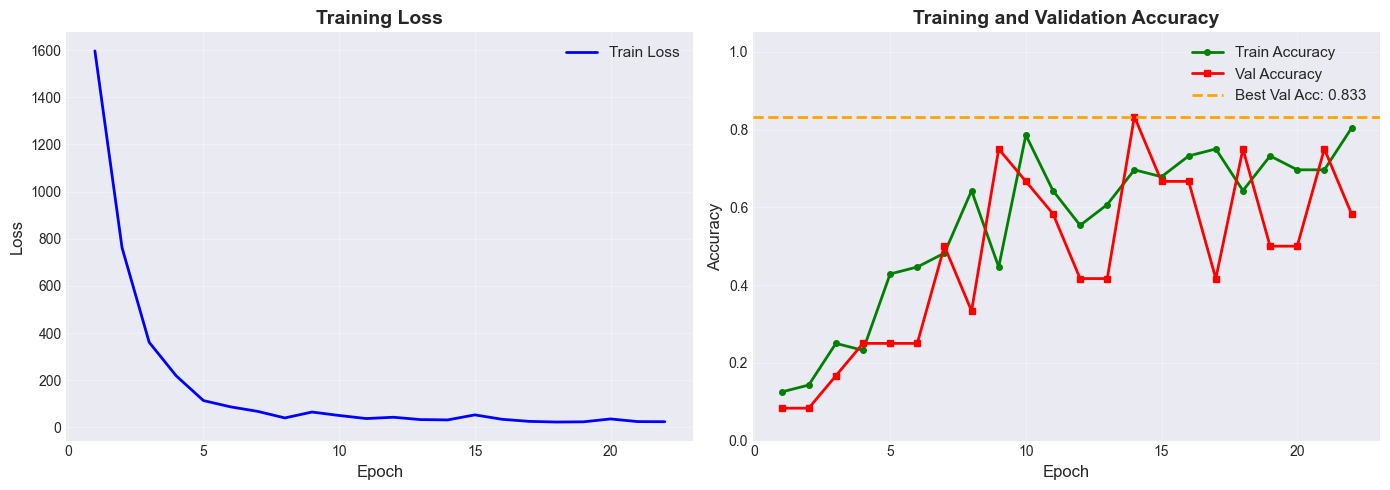


Final metrics:
  Train Loss: 24.1832
  Train Accuracy: 0.804
  Val Accuracy: 0.583
  Best Val Accuracy: 0.833
  Test Accuracy: 0.667


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    plt.style.use('seaborn-v0_8-darkgrid')
except OSError:
    try:
        plt.style.use('seaborn-darkgrid')
    except OSError:
        plt.style.use('default')
sns.set_palette("husl")


if history:
    epochs = [h['epoch'] for h in history]
    train_losses = [h['train_loss'] for h in history]
    train_accs = [h['train_acc'] for h in history]
    val_accs = [h['val_acc'] for h in history]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(epochs, train_losses, 'b-', label='Train Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Training Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(epochs, train_accs, 'g-', label='Train Accuracy', linewidth=2, marker='o', markersize=4)
    axes[1].plot(epochs, val_accs, 'r-', label='Val Accuracy', linewidth=2, marker='s', markersize=4)
    axes[1].axhline(y=results['best_val_acc'], color='orange', linestyle='--', 
                    label=f'Best Val Acc: {results["best_val_acc"]:.3f}', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, 1.05])
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nFinal metrics:")
    print(f"  Train Loss: {train_losses[-1]:.4f}")
    print(f"  Train Accuracy: {train_accs[-1]:.3f}")
    print(f"  Val Accuracy: {val_accs[-1]:.3f}")
    print(f"  Best Val Accuracy: {results['best_val_acc']:.3f}")
    print(f"  Test Accuracy: {results['test_acc']:.3f}")
else:
    print("No training history available.")


In [ ]:
confusion_matrix = results['confusion_matrix']
label_names = results['label_names']

confusion_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, yticklabels=label_names,
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('True', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

sns.heatmap(confusion_matrix_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names,
            ax=axes[1], cbar_kws={'label': 'Proportion'})
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('True', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

print("\nPer-class Accuracy:")
for i, label_name in enumerate(label_names):
    class_correct = confusion_matrix[i, i]
    class_total = confusion_matrix[i, :].sum()
    class_acc = class_correct / max(1, class_total)
    print(f"  {label_name:15s}: {class_acc:.3f} ({class_correct}/{class_total})")


In [ ]:
from src.training.train_seq_classifier import test_model

checkpoint_path = results.get('checkpoint_path', str(Path(HYPERPARAMS["model_dir"]) / "visig_simple_cnn.pt"))

print(f"Loading model from: {checkpoint_path}")

test_results = test_model(
    checkpoint_path=checkpoint_path,
    data_root=data_root,
    max_len=HYPERPARAMS["max_len"],
    batch_size=HYPERPARAMS["batch_size"],
)


In [ ]:
test_confusion_matrix = test_results['confusion_matrix']
test_label_names = test_results['label_names']

test_confusion_matrix_norm = test_confusion_matrix.astype('float') / test_confusion_matrix.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_label_names, yticklabels=test_label_names,
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Test Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('True', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

sns.heatmap(test_confusion_matrix_norm, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=test_label_names, yticklabels=test_label_names,
            ax=axes[1], cbar_kws={'label': 'Proportion'})
axes[1].set_title('Test Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('True', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

print(f"\nTest Accuracy: {test_results['test_acc']:.3f}")
print("\nPer-class Test Accuracy:")
for i, label_name in enumerate(test_label_names):
    class_correct = test_confusion_matrix[i, i]
    class_total = test_confusion_matrix[i, :].sum()
    class_acc = class_correct / max(1, class_total)
    print(f"  {label_name:15s}: {class_acc:.3f} ({class_correct}/{class_total})")
